In [3]:
import numpy as np #Módulo para hacer operaciones matematicas con matrices.
from scipy import signal # Módulo LTI. 
from scipy import integrate
from matplotlib import pyplot as plt # graficar

Variables globales

In [19]:
Tsim=220
l0=0.5 #m
g=9.8 #m/s**2
M=10 #Kg
T0=1 #N
d=1 #N/rad
x0=[np.arcsin(T0/(M*g*l0)),0]
print(x0)

[0.020409580174174, 0]


Funciones

In [20]:
def torque(t):
  return T0+0.3*T0*np.heaviside(t-10,1)-0.6*T0*np.heaviside(t-100,1)
def dx(t,x):
  return np.array([x[1],-d*x[1]/M-g*np.sin(x[0])/l0+torque(t)/(M*l0**2.)])

Simulación

In [21]:
out=integrate.solve_ivp(dx,[0.0,Tsim],x0,max_step=1,vectorized=False)

Variables de estado

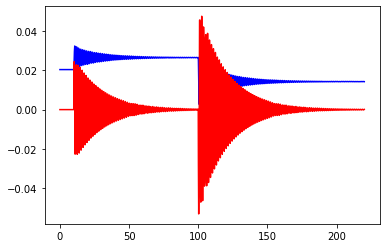

In [22]:
plt.plot(out.t,out.y[0,:],'b',out.t,out.y[1,:],'r')

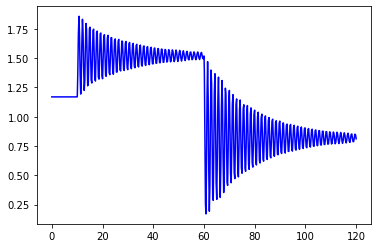

In [15]:
plt.plot(out.t,np.rad2deg(out.y[0,:]),'b')

Sistema linealizado

In [16]:
A=np.array([[0.,1.],[-g*np.cos(x0[0])/l0 ,-d/M]])
B=np.array([[0],[1/(M*l0**2)]])
C=np.array([[1,0]])
D=np.array([[0]])
sys=signal.lti(A,B,C,D)

Simulación de sistema lineal

In [17]:
t=np.linspace(0,Tsim,num=1000)
tout, yout, xout=signal.lsim(sys,torque(t)-T0,t)

Grafica del sistema linealizado

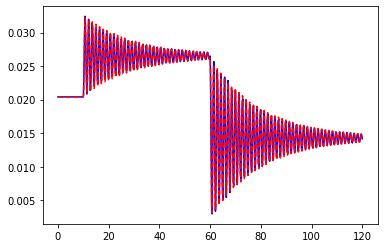

In [18]:
plt.plot(out.t,out.y[0,:],'b',tout,yout+x0[0],'--r')